In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import SimpleITK as stk
from glob import glob
from tqdm import tqdm

In [2]:
root = "/Users/STUFF/lungnode/"

In [3]:
annotations_df = pd.read_csv(root+"annotations.csv")
candidates_df = pd.read_csv(root+"candidates_V2.csv")

In [4]:
candidates_df.head()

seriesuid     coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  68.420000  -74.480000   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -95.209361  -91.809406   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -24.766755 -120.379294   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -63.080000  -65.740000   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  52.946688  -92.688873   

       coordZ  class  
0 -288.700000      0  
1 -377.426350      0  
2 -273.361539      0  
3 -344.240000      0  
4 -241.067872      0

In [5]:
annotations_df.head()

seriesuid      coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -128.699421 -175.319272   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.783651 -211.925149   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...   69.639017 -140.944586   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  -24.013824  192.102405   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...    2.441547  172.464881   

       coordZ  diameter_mm  
0 -298.387506     5.651471  
1 -227.121250     4.224708  
2  876.374496     5.786348  
3 -391.081276     8.143262  
4 -405.493732    18.545150

In [6]:
candidates_df['class'].sum()

1557

In [7]:
len(annotations_df)

1186

In [8]:
candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754975 entries, 0 to 754974
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   seriesuid  754975 non-null  object 
 1   coordX     754975 non-null  float64
 2   coordY     754975 non-null  float64
 3   coordZ     754975 non-null  float64
 4   class      754975 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 28.8+ MB


In [9]:
def get_filename(file_list, file):
    for f in file_list:
        if file in f:
            return f

In [10]:
def load_mhd(file):
    mhdimage = stk.ReadImage(file)
    ct_scan = stk.GetArrayFromImage(mhdimage)
    origin = np.array(list(mhdimage.GetOrigin()))
    space = np.array(list(mhdimage.GetSpacing()))
    return ct_scan, origin, space

In [11]:
subset = 0    # Ran for 0...9
file_list = glob(root+f"subset{subset}/*.mhd")
print("Files Count:",len(file_list))

Files Count: 89


In [12]:
annotations_df["filename"] = annotations_df["seriesuid"].map(lambda file: get_filename(file_list, file))
annotations_df = annotations_df.dropna()
print(len(annotations_df))

112


In [13]:
candidates_df["filename"] = candidates_df["seriesuid"].map(lambda file: get_filename(file_list, file))
candidates_df = candidates_df.dropna()
print(len(candidates_df))

79135


In [14]:
annotations_df.head()

seriesuid      coordX      coordY  \
23  1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896... -100.567944   67.260517   
25  1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...   46.188539   48.402806   
26  1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...   36.392044   76.771663   
28  1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674...  136.434059  117.765579   
86  1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048...  145.967465 -161.197634   

        coordZ  diameter_mm                                           filename  
23 -231.816619     6.440879  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
25 -108.578632    13.596471  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
26 -123.321911     4.343200  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
28 -181.947817     4.681382  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
86 -312.071347     6.378436  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...

In [15]:
candidates_df.head()

seriesuid      coordX  \
11673  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  -66.383107   
11674  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031... -132.856859   
11675  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...   84.770000   
11676  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  134.805360   
11677  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  -87.092676   

          coordY      coordZ  class  \
11673  57.143607  -60.885862      0   
11674  23.813034 -274.350845      0   
11675  66.170000 -249.880000      0   
11676  29.696241 -268.116009      0   
11677  41.722383 -208.831394      0   

                                                filename  
11673  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
11674  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
11675  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
11676  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...  
11677  /Users/STUFF/lungnode/subset0/1.3.6.1.4.1.1451...

In [16]:
def display(imgs, titles=None, cmap="bone"):
    n = len(list(imgs))
    r = n//4 if n%4==0 else (n//4)+1
    plt.figure(figsize=(25,int(6*r)))
    for i,img in enumerate(imgs):
        plt.subplot(r,4,i+1)
        if titles is not None:
            plt.title(titles[i])
        plt.imshow(img, cmap=cmap)

In [17]:
def display_small(imgs, titles=None, cmap="bone"):
    n = len(list(imgs))
    r = n//6 if n%6==0 else (n//6)+1
    plt.figure(figsize=(25,int(4*r)))
    for i,img in enumerate(imgs):
        plt.subplot(r,6,i+1)
        if titles is not None:
            plt.title(titles[i])
        plt.imshow(img, cmap=cmap)

In [18]:
imgs = []
rois = []
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for i,file in tqdm(enumerate(np.unique(annotations_df['filename'].values))):
    annotations = annotations_df[annotations_df["filename"]==file]
    ct, origin, space = load_mhd(file)
    num_z, height, width = ct.shape
    ct_norm = cv2.normalize(ct, None, 0, 255, cv2.NORM_MINMAX)
    for idx, row in annotations.iterrows():
        node_x = int(row["coordX"])
        node_y = int(row["coordY"])
        node_z = int(row["coordZ"])
        diam = int(row["diameter_mm"])
        
        center = np.array([node_x, node_y, node_z])   # nodule center
        v_center = np.rint((center-origin)/space)   # nodule center in voxel space (still x,y,z ordering)

        img_norm = ct_norm[int(v_center[2]),:,:]
        img_norm = cv2.resize(img_norm, (512,512))
        img_norm_improved = clahe.apply(img_norm.astype(np.uint8))
        
        x=abs(int(v_center[0]))
        y=abs(int(v_center[1]))
        bb = cv2.rectangle(img_norm_improved, (x-25,y-25), (x+25,y+25), (255), 2)
        cc = img_norm_improved[y-25:y+25,x-25:x+25]
        imgs.append(bb)
        rois.append(cc)

67it [00:11,  5.91it/s]


In [19]:
imgs_c = []
rois_c = []
cat = []
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for i,file in tqdm(enumerate(np.unique(candidates_df['filename'].values)[:15]), total=len(np.unique(candidates_df['filename'].values)[:15])):
    candidates = candidates_df[candidates_df["filename"]==file]
    ct, origin, space = load_mhd(file)
    num_z, height, width = ct.shape
    ct_norm = cv2.normalize(ct, None, 0, 255, cv2.NORM_MINMAX)
    for idx, row in candidates.iterrows():
        node_x = int(row["coordX"])
        node_y = int(row["coordY"])
        node_z = int(row["coordZ"])
        c = int(row["class"])
        
        center = np.array([node_x, node_y, node_z])   # nodule center
        v_center = np.rint((center-origin)/space)   # nodule center in voxel space (still x,y,z ordering)

        img_norm = ct_norm[int(v_center[2]),:,:]
        img_norm = cv2.resize(img_norm, (512,512))
        img_norm_improved = clahe.apply(img_norm.astype(np.uint8))
        
        x=abs(int(v_center[0]))
        y=abs(int(v_center[1]))
        bb = cv2.rectangle(img_norm_improved, (x-25,y-25), (x+25,y+25), (255), 2)
        cc = img_norm_improved[y-25:y+25,x-25:x+25]
        imgs_c.append(bb)
        rois_c.append(cc)
        cat.append(c)

100%|██████████| 15/15 [00:07<00:00,  1.88it/s]


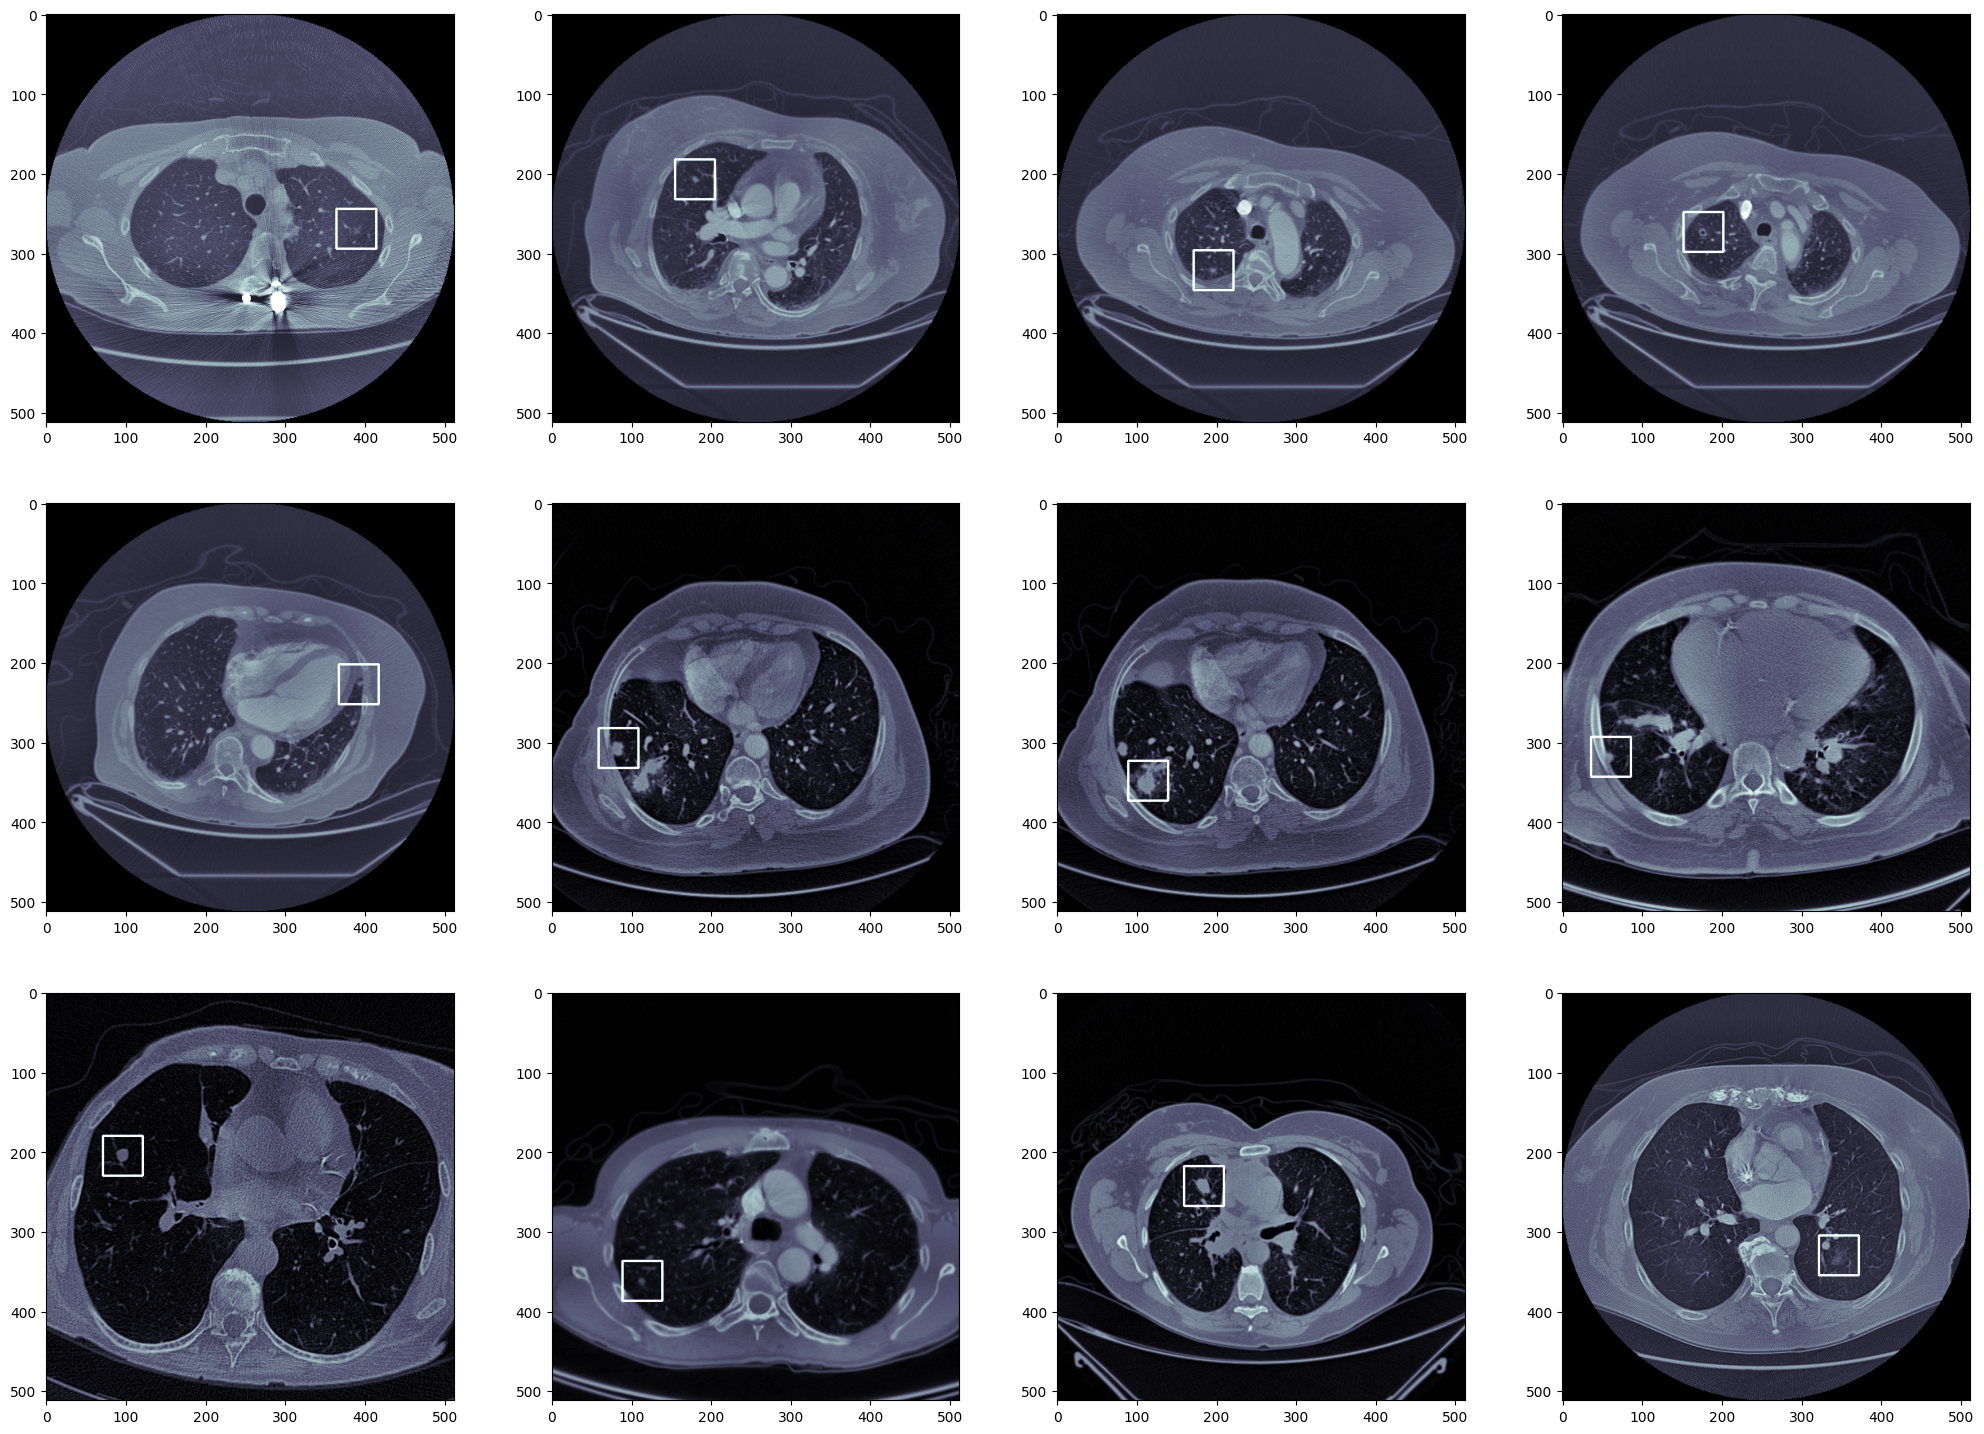

In [20]:
display(imgs[8:20])

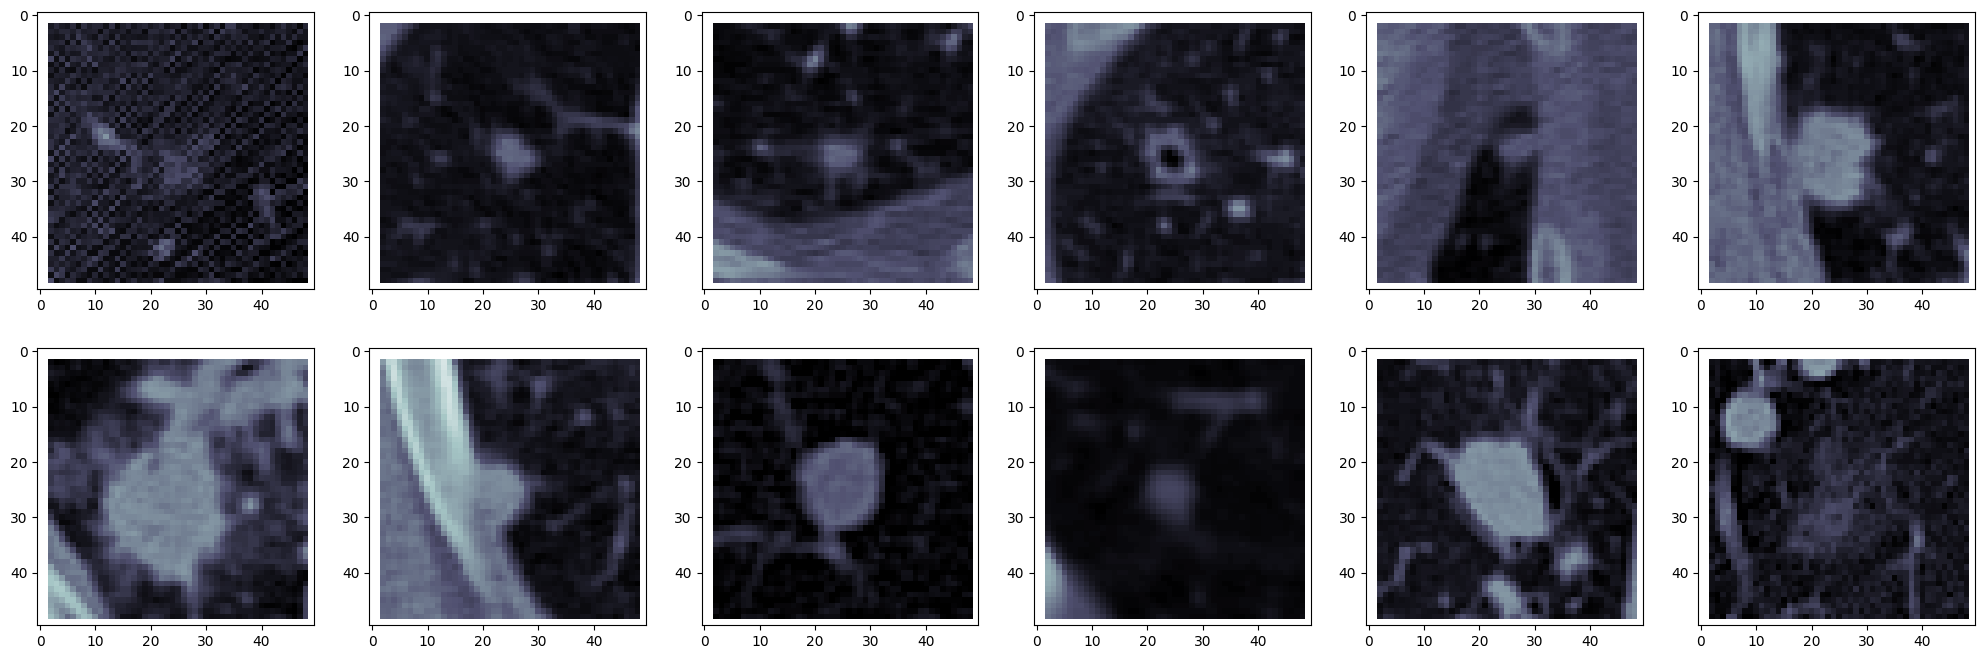

In [21]:
display_small(rois[8:20])

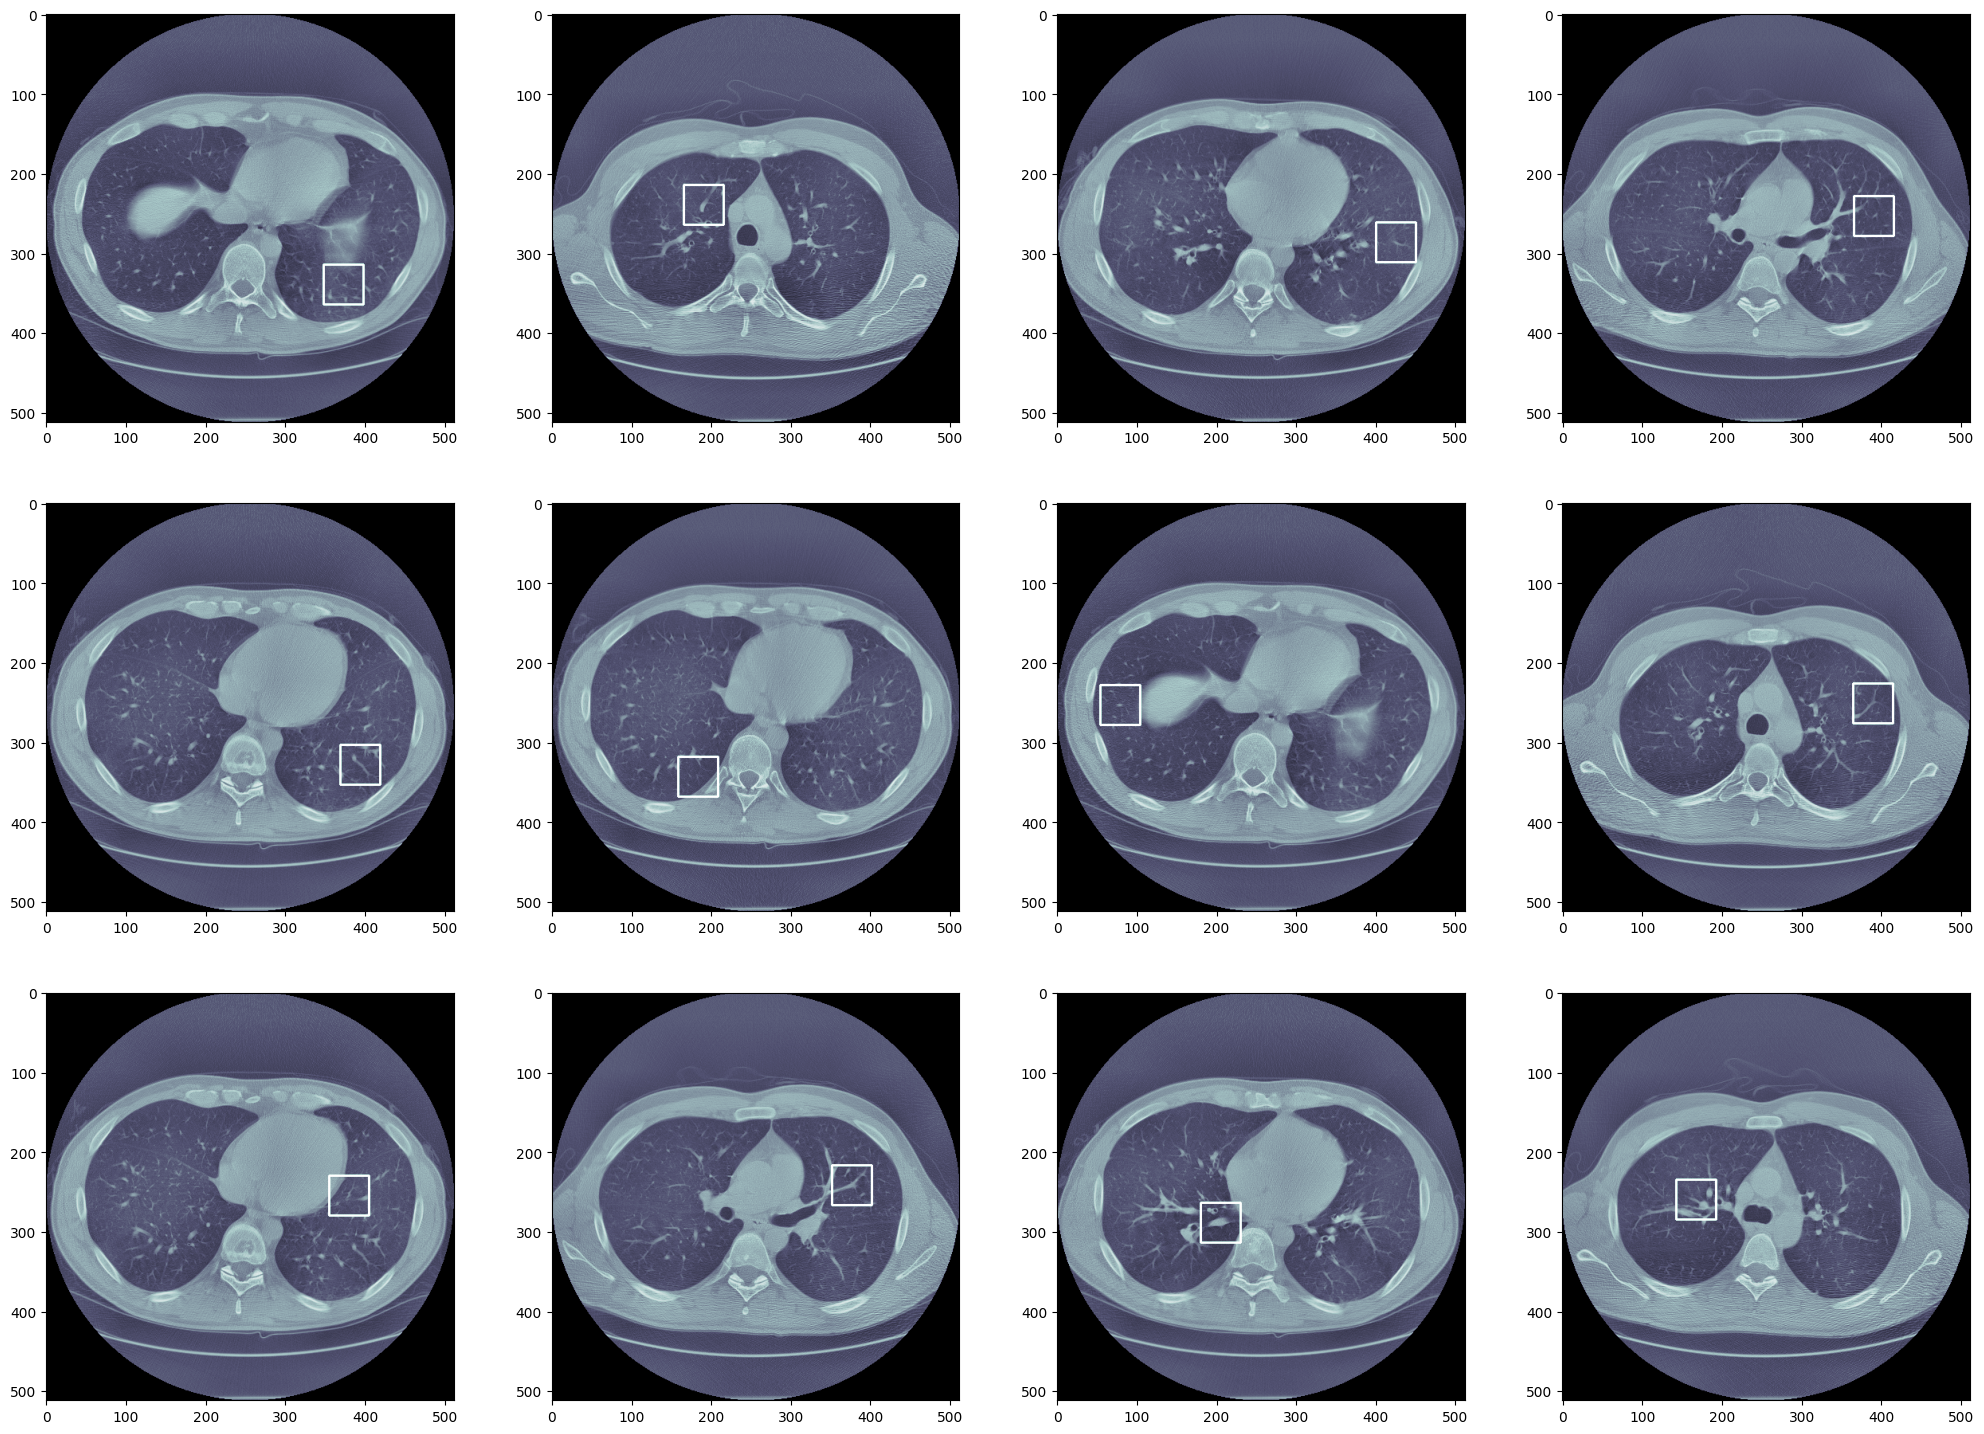

In [22]:
display(imgs_c[8:20])

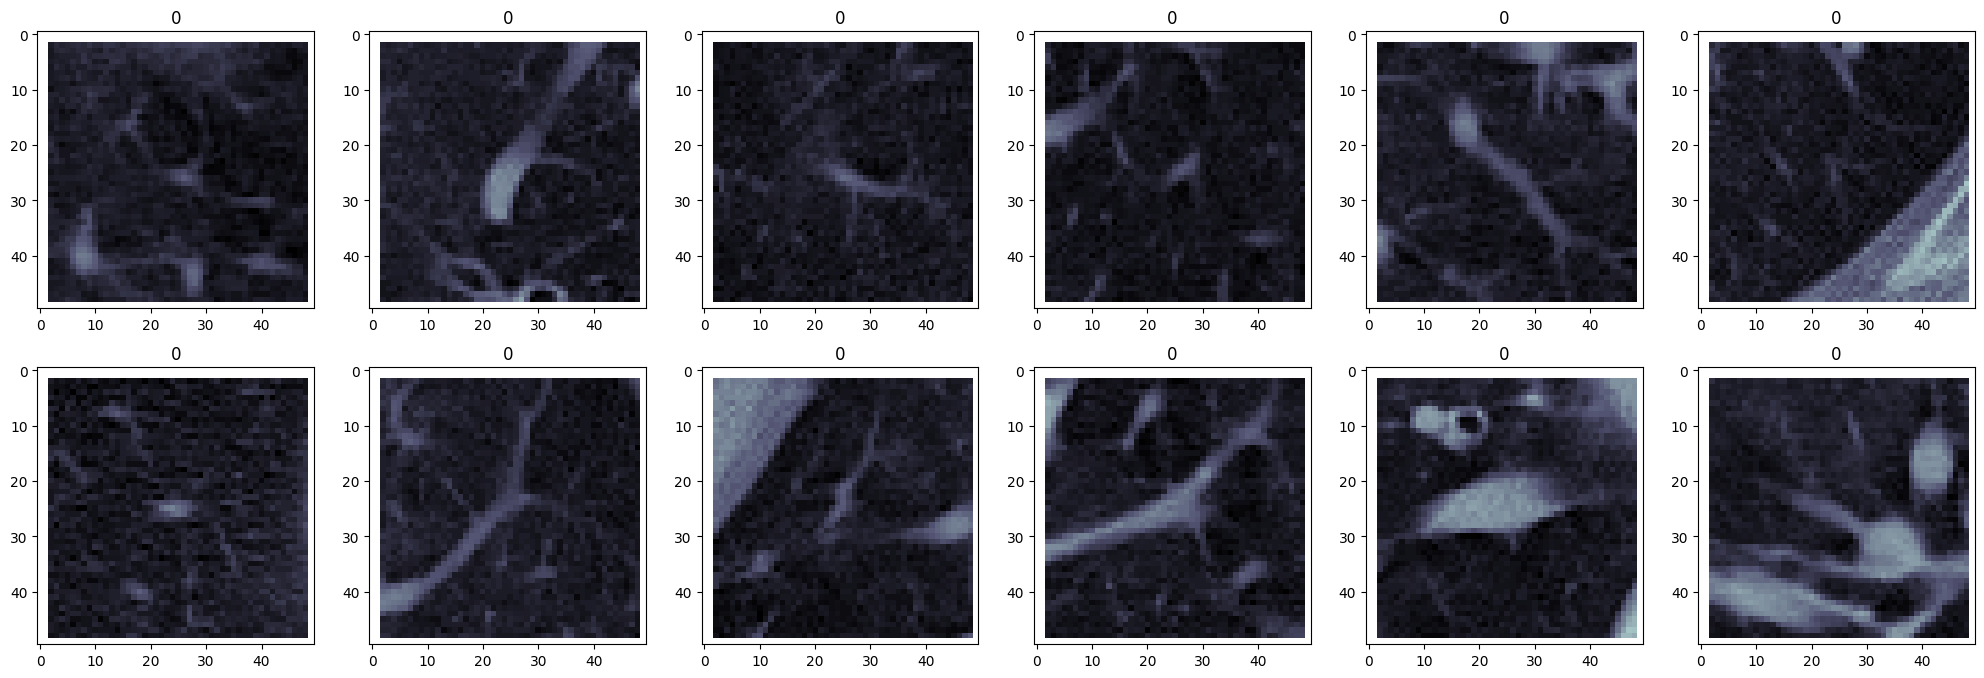

In [23]:
display_small(rois_c[8:20], titles=cat[8:20])

DATA AUGMENTATION

In [24]:
test = rois_c[8:20]

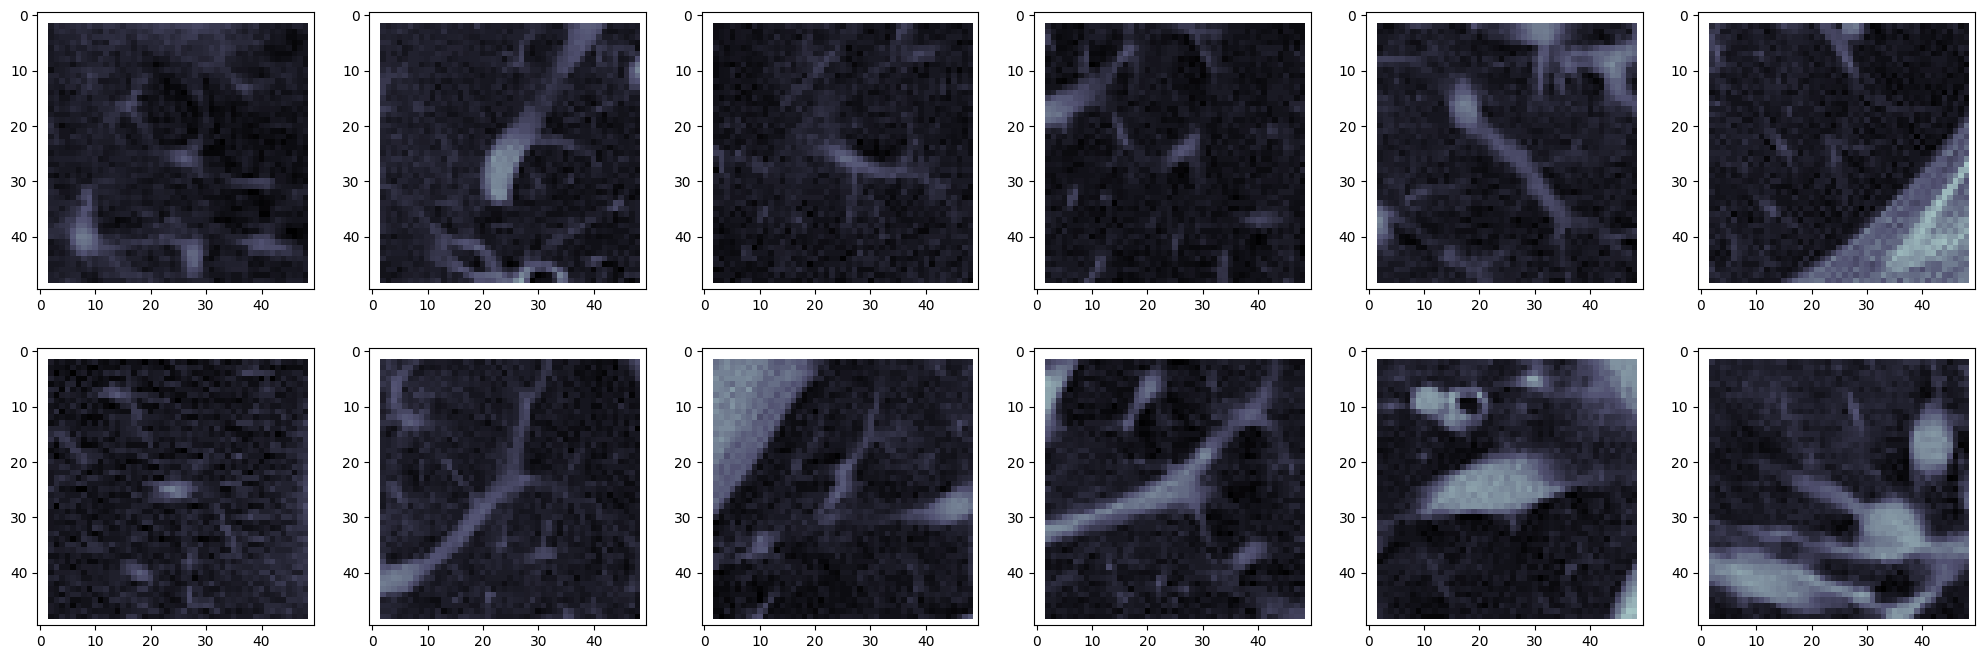

In [25]:
display_small(test)

In [26]:
lr = []    # Left Rotation 90
rr = []    # Right Rotation 90
ur = []    # 180 Rotation
f = []     # Horizontal Flip
for i in test:
    rr.append(cv2.rotate(i,cv2.ROTATE_90_CLOCKWISE))
    lr.append(cv2.rotate(i, cv2.ROTATE_90_COUNTERCLOCKWISE))
    ur.append(cv2.rotate(i, cv2.ROTATE_180))
    f.append(cv2.flip(i, 1))

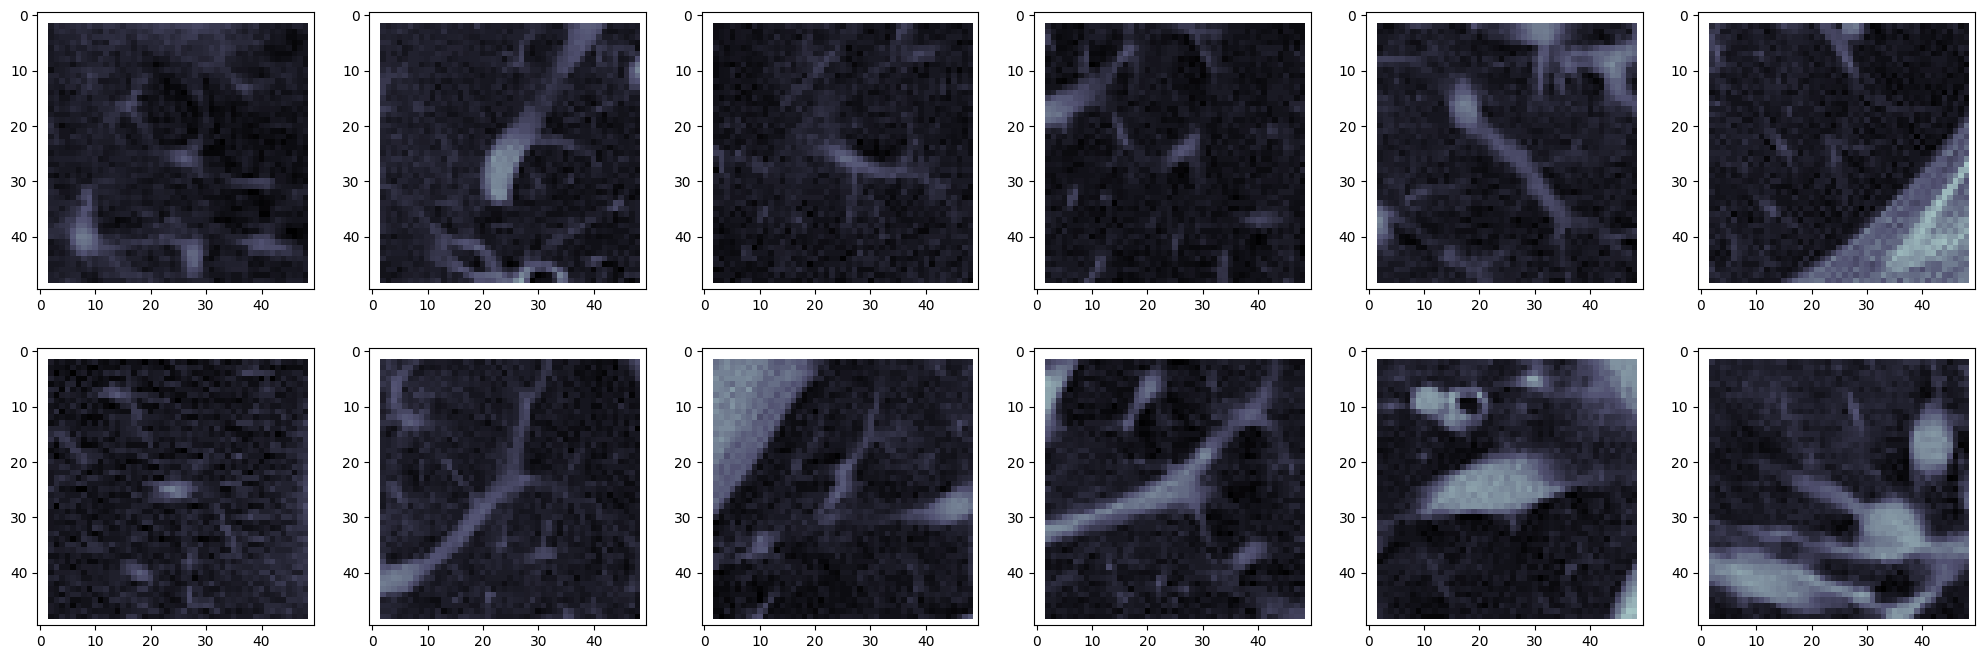

In [27]:
display_small(test)

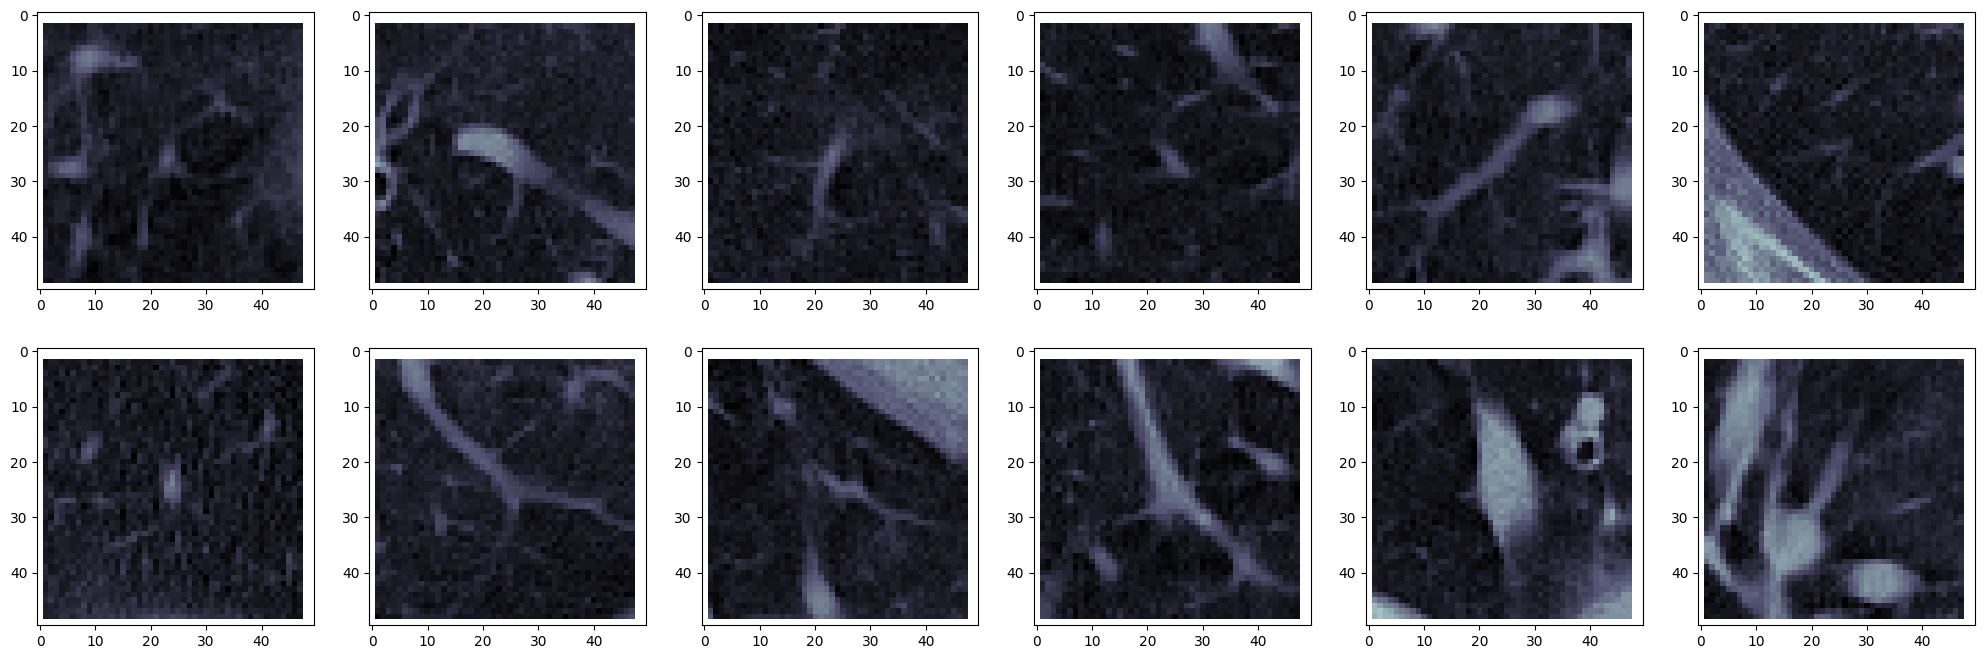

In [28]:
display_small(rr)

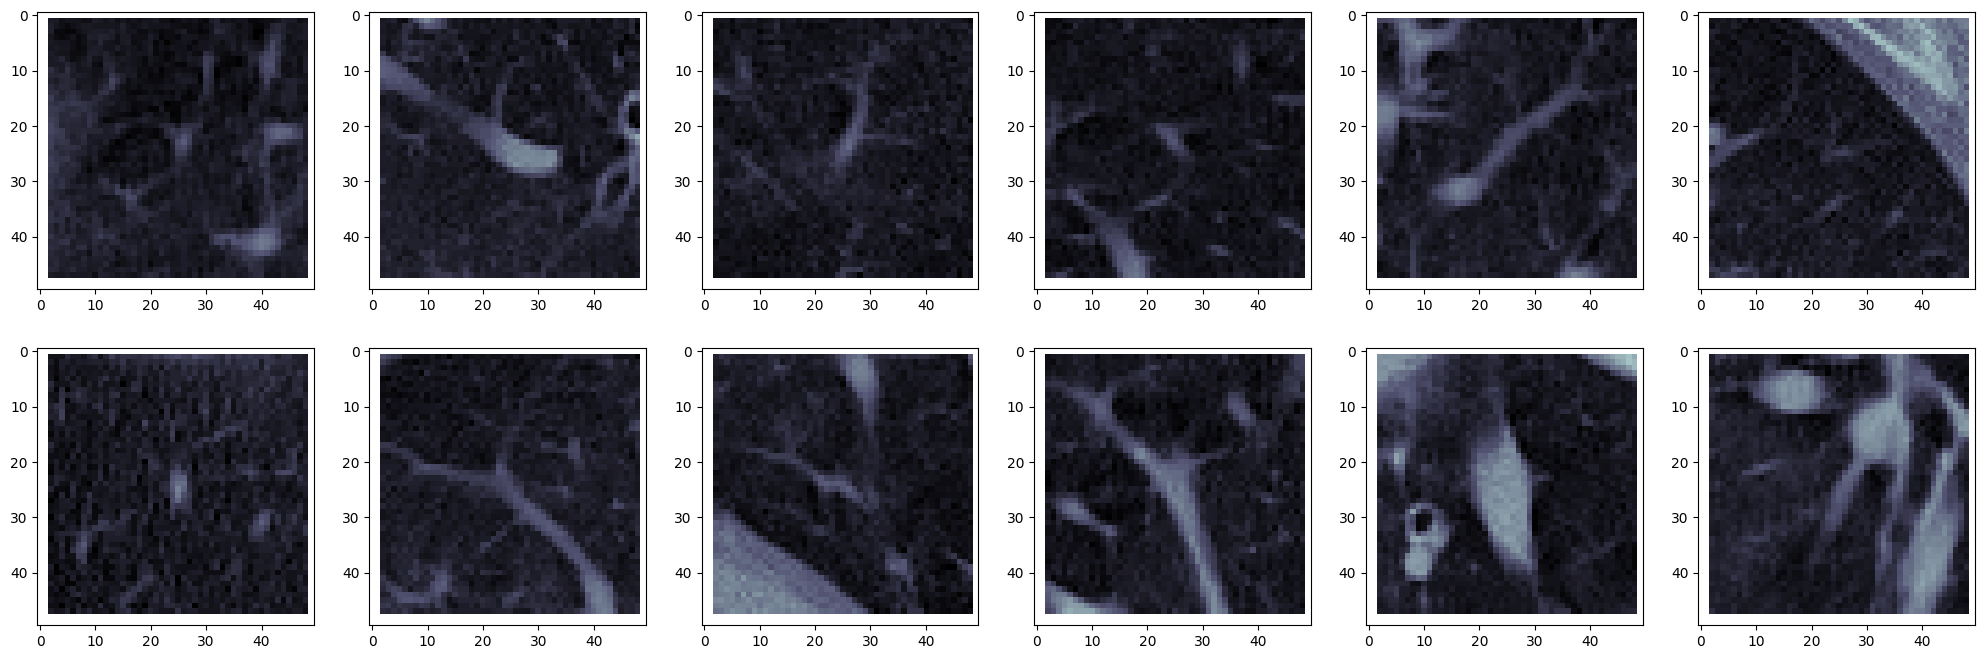

In [29]:
display_small(lr)

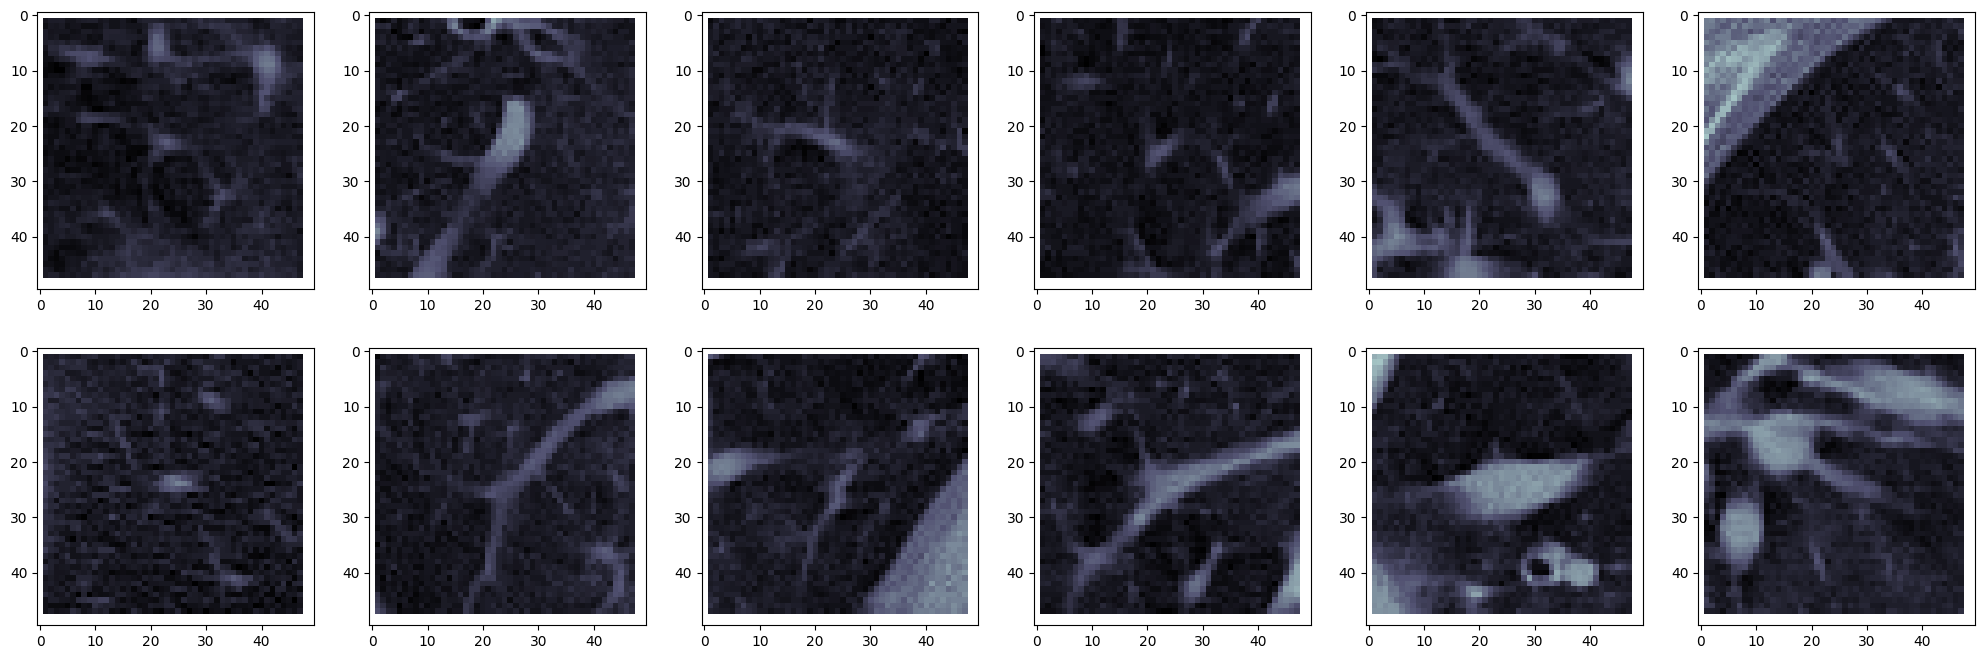

In [30]:
display_small(ur)

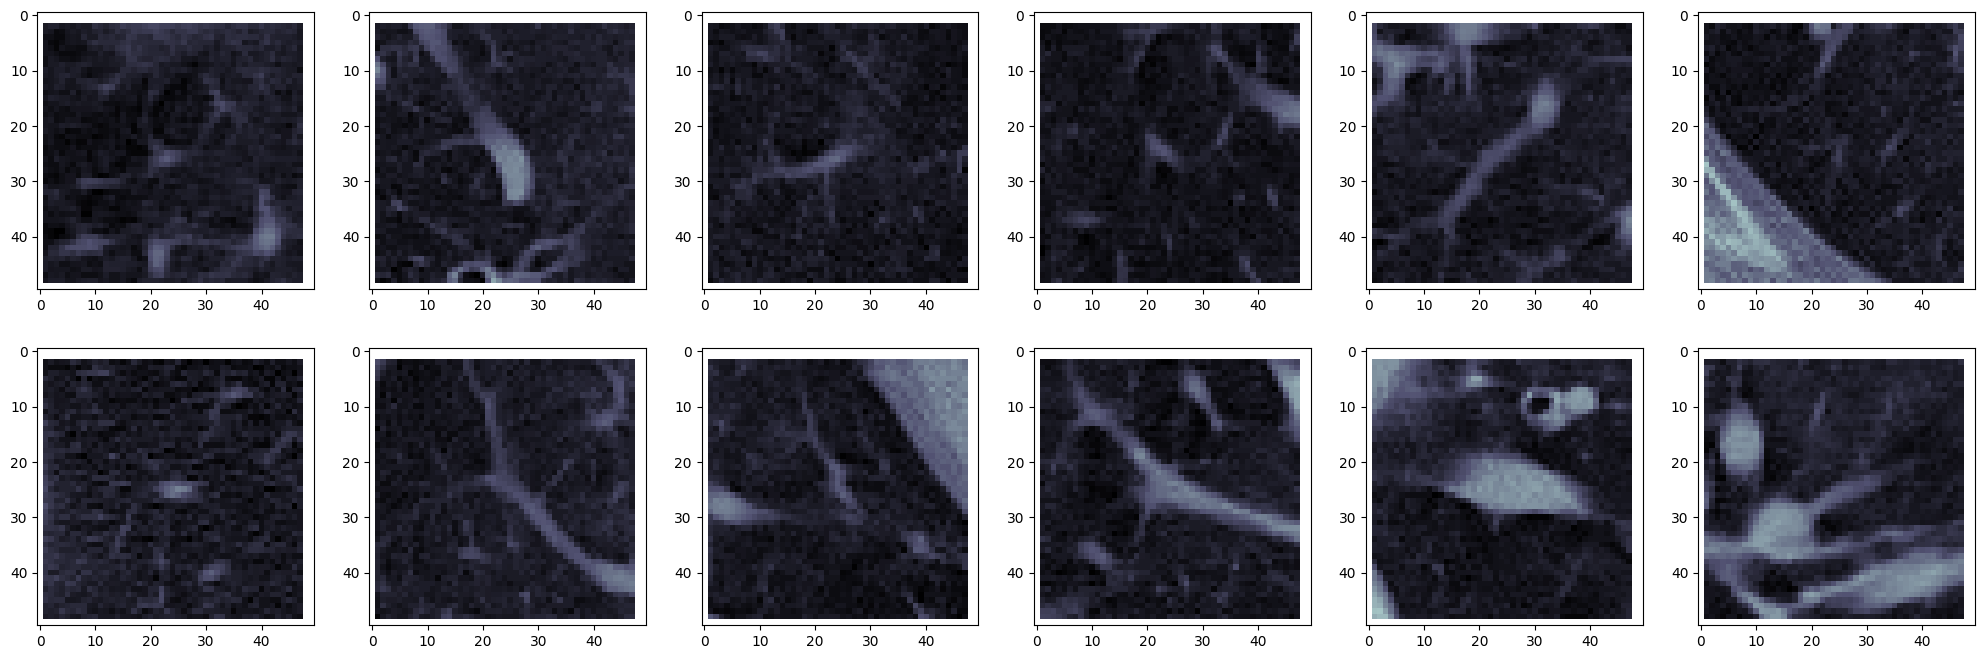

In [31]:
display_small(f)